 
<br>
<h1 align="center">《基于降维处理的手写数字聚类分析》</h1>
 
<br><br>





## 一、问题研究

&emsp;&emsp;现有一份关于 **`手写数字(数字0~9)`** 的数据样本，需要对样本中的10种数字进行 **`聚类分析`**。但是在这份手写数字样本中，由于每个样本(8x8像素的图片)的特征维度较大，总体样本的数量也较大，故针对原始数据集的聚类分析成本将会比较大。

要求：

<font size=5>&emsp;&emsp;请采用合适的数据预处理方法，对样本数据进行聚类分析，并评估处理效果。</font>


## 二、问题分析

### 2.1 问题背景

&emsp;&emsp;由于各种可能的原因，有时我们无法考虑和分析收集到的所有特征。尽管高维数据有一定的优点，数据维度高，其所包含的信息量大，可供决策的依据多。但是数据不是维度越高越好，因为还需要考虑实际的计算能力，高维度数据的缺点，消耗计算资源，计算时间大，同时使得冗余且耦合的数据对实验结果造成影响，甚至造成 “**维度灾难**”。特征太多以至于考虑所有特征会显著提高分析成本、或者有些特征干脆只是没有真实意义的噪音。所以，在工作中，我们常常需要先将数据进行降维，再对其进行分析与处理。

数据的降维对我们提出了以下要求：

- 减少特征属性的个数，剔除不相关或冗余特征。
- 提高模型精确度，确保特征属性之间是相互独立的。
- 保留更少的特征，降维的过程信息损失要尽可能的小。

### 2.2 工作综述

&emsp;&emsp;在本报告中，我们将针对 `sklearn` 库中 8x8 像素的 `手写数字图片` 进行降维、可视化等处理，以实践数据降维在数据预处理阶段的可行性以及有效性。

&emsp;&emsp;通过单幅图像数据的高维化, 将单幅图像转化为高维空间中的数据集合, 再对其进行非线性降维, 寻求其高维数据流形本征结构的一维表示向量, 将其作为图像数据的特征表达向量。从而将高维图像识别问题转化为特征表达向量的识别问题, 大大降低了计算的复杂程度, 减少了冗余信息所造成的识别误差, 提高了识别的精度。

### 2.3 所涉及的机器学习算法

- PCA 数据降维算法
- T-SNE 数据降维算法
- UMAP 数据降维算法
- KMeans 聚类算法

### 2.4 导入数据集

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [224]:
from sklearn import datasets
digits = datasets.load_digits()

# 获取 digits 数据集的样本和特征
samples = digits['data']
label = digits['target']

# 获取手写数据集的描述
# digits.keys()
# digits.DESCR

digits 数据集的主要内容：  

    ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

digits 数据集的简要说明：   

    - Number of Instances: 1797
    - Number of Attributes: 64
    - Attribute Information: 8x8 image of integer pixels in the range 0..16.
    - Missing Attribute Values: None
    - Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    - Date: July; 1998

可视化部分样本

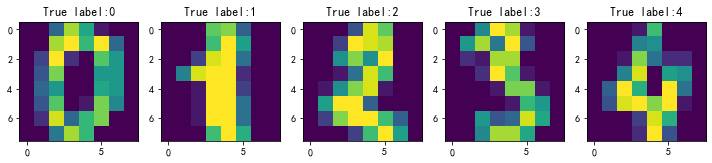

In [225]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10, 20))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(samples[i].reshape(8,8))
    plt.title('True label:{}'.format(label[i]))

plt.tight_layout()

## 三、数据降维处理

### 3.1 PCA 降维

#### 3.1.1 PCA 算法原理

假设给定m个n维数据$Y=(y_1,y_2,...,y_m)$,投影变换后新的坐标系空间为$W=(w_1,w_2,...,w_n)$
2.1.1 数据中心化
一方面，不同特征量纲的差异会导致不同特征的方差存在先天差异，而数据中心化在一定程度 上可以消除这种先天差异；另一方面数据中心化不会改变数据本身的形状，但可以大大降低计 算量。数据中心化具体操作如下：

$$X=\left(x_{1}, x_{2}, \ldots, x_{m}\right)=\left(y_{1}-\mu, y_{2}-\mu, \ldots, y_{m}-\mu\right)$$

其中  $\mu=\frac{1}{m} \sum_{i=1}^{m} y_{i}$ ,从而 $ \sum_{i=1}^{m} x_{i}=0$ 
变换坐标空间，数据在新坐标系W下的坐标如下:

$$W^{T} X=\left(W^{T} x_{1}, W^{T} x_{2}, \ldots, W^{T} x_{m}\right)$$

样本点 $ x_{i} $ 在新的坐标系中的坐标为 $$z_{i}=(w_{1}^{T} x_{i}, w_{2}^{T} x_{i}, \ldots, w_{n}^{T} x_{i},)$$

则数据在新坐标空间下也是中心化的，具体如下:

$$\sum_{i=1}^{m} w_{j}^{T} x_{i}=w_{j}^{T} \sum_{i=1}^{m} x_{i}=0$$
\text { 其中 }$ j=1,2 \ldots, n$
2.1.2 求解第一主轴（投影方差最大的维度方向）
不失一般性，假设  $w_{1}$  为第一主轴方向，由于数据在  $w_{1}$  轴下是中心化了的，因此样本数据在  $w_{1}$  上的均值为 0 ，即样本数据在  $w_{1}$  轴的投影方差表达式如下:

$$\operatorname{Var}_{w_{1}}=\frac{1}{m} \sum_{i=1}^{m}\left(w_{1}^{T} x_{i}\right)^{2}=\frac{1}{m} \sum_{i=1}^{m} x_{i}^{T} w_{1} w_{1}^{T} x_{i}=\frac{1}{m} \sum_{i=1}^{m} w_{1}^{T} x_{i} x_{i}^{T} w_{1}$$

由于求和项与  $w_{1}$  无关，所以

$$V a r_{w_{1}}=\frac{1}{m} w_{1}^{T}\left(\sum_{i=1}^{m} x_{i} x_{i}^{T}\right) w_{1}$$

注意，其实括号里面是一个矩阵乘以自身的转置，即：

$$\sum_{i=1}^{m} x_{i} x_{i}^{T}=X X^{T}$$

所以

$$V a r_{w_{1}}=\frac{1}{m} w_{1}^{T} X X^{T} w_{1}$$

如果没有前面的  $1 / n$  ，那就是就是一个标准的二次型! 可以证明  $X X^{T}$  为一个半正定矩阵 (证 明略：证明所有特征值大于等于0即可)，半正定矩阵存在最大值!
到此，主轴投影方差最大化问题可以抽象为以下模型：
$$\begin{array}{c}
\max \operatorname{Var}_{w_{1}}=w_{1}^{T} X X^{T} w_{1} \\
\text { s.t. } w_{1}^{T} w_{1}=1
\end{array}$$

#### 3.1.2 特征矩阵降为2维

In [226]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(samples)

In [227]:
# 对降维后的数据进行归一化处理
X_pca = MinMaxScaler().fit_transform(X_pca)

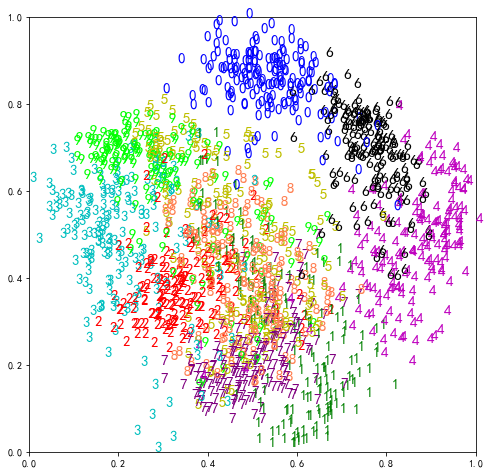

In [228]:
# 可视化降维后的结果

# 用于区分可视化数字 0-9 的十种颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'coral', 'lime']

# 用于标识可视化点的的字重及字体大小
fontdicts = {'weight':'bold','size':15}


def display2D(X, title=None, size=None, local=None):
    """ 传入降维后的特征矩阵，进行可视化 
        @ size:  画布的大小
        @ local: 子图的位置
    """

    # 可将多个子图显示到同一画布上
    if size == None:
        plt.figure(figsize = (8, 8))
    else:
        plt.figure(1, figsize = size)
        
    # 排列多个子图的布局，方便比对
    if local != None:
        plt.subplot(local)

    # 绘图
    for i in range(samples.shape[0]):
        plt.text(X[i,0], X[i,1], str(label[i]), 
                color=colors[label[i]], fontdict=fontdicts)
                
    plt.title(title)

display2D(X_pca)

#### 3.1.3 特征矩阵降为3维

In [229]:
pca = PCA(n_components = 3,random_state = 0)
X_pca3 = pca.fit_transform(samples)

In [230]:
# 对降维后的数据进行归一化处理
X_pca3 = MinMaxScaler().fit_transform(X_pca3)

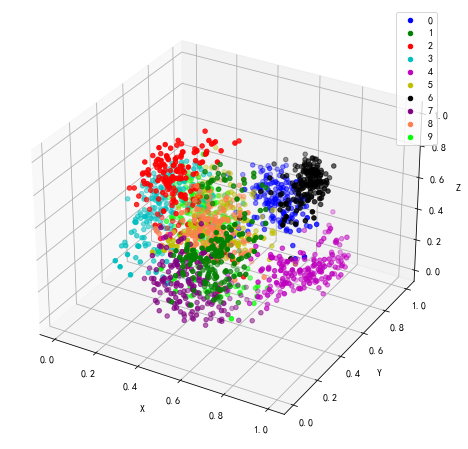

In [231]:
# 可视化降维后的结果

from mpl_toolkits.mplot3d import Axes3D

def display3D(X, title=None, size=None, local=None):
    """ 传入降维后的特征矩阵，进行可视化 
        @ size:  画布的大小
        @ local: 子图的位置
    """
 
    # 可将多个子图显示到同一画布上
    if size == None:
        fig = plt.figure(figsize = (8, 8))
    else:
        fig = plt.figure(1, figsize = size)
 
    # 排列多个子图的布局，方便比对
    if local == None:
        ax = plt.subplot(projection='3d')
    else:
        ax = fig.add_subplot(local, projection = '3d')

    for lab,color,category in zip(label, colors, list(range(10))):
        ax.scatter3D(X[label==lab, 0], X[label==lab, 1], X[label==lab, 2],
                        label = category, c = color)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(title)

display3D(X_pca3)

### 3.2 T-SNE 数据降维

#### 3.2.1 T-SNE 算法原理


SNE使用条件概率来描述两个数据之间的相似性，假设$x_i,x_j$是高维空间中的两个点，那么以点$x_i$为中心构建方差为$\sigma $的高斯分布，使用$P_{j|i}$表示$x_j$是$x_i$邻域的概率，如果$x_j$离$x_i$很近，那么$P_{j|i}$很大，反之，$P_{j|i}$很小，$P_{j|i}$定义如下：

$$p_{j \mid i}=\frac{\exp \left(-\left\|x_{i}-x_{j}\right\|^{2} /\left(2 \sigma_{i}^{2}\right)\right)}{\sum_{k \neq i} \exp \left(-\left\|x_{i}-x_{k}\right\|^{2} /\left(2 \sigma_{i}^{2}\right)\right)}$$

我们只关心不同点对之间的相似度，所以设定$P_{j|i}$=0

那么在低维空间中也可以使用这样的条件概率来定义距离，假设$x_i,x_j$映射到低维空间后对应$y_i,y_j$,$y_i$是$y_j$邻域的条件概率$q_{j|i}$:

$$q_{j \mid i}=\frac{\exp \left(-\left\|y_{i}-y_{j}\right\|^{2}\right)}{\sum_{k \neq i} \exp \left(-\left\|y_{i}-y_{k}\right\|^{2}\right)}$$

在高维空间中，如果考虑 $x_i$与其他所有点之间的条件概率，那么会构成一个条件概率分布$P_i$ ，同样在低维空间也会有与之对应的条件概率分布 $Q_i$，如果降维之后的数据分布与原始高维空间中的数据分布是一样的，那么理论上这两个条件概率分布式是一致的。那么如何衡量两个条件概率分布之间的差异呢？答案是使用 K-L 散度（也叫做相对熵），于是，目标函数为：

$$C=\sum_{i} K L\left(P_{i} \| Q_{i}\right)=\sum_{i} \sum_{j} p_{j \mid i} \log \frac{p_{j \mid i}}{q_{j \mid i}}$$

原始 SNE 中，在高维空间中条件概率 $P_{j|i}$不等于$P_{j|i}$，于是提出对称 SNE，采用更加通用的联合概率分布代替原始的条件概率，使得$P_{j|i}$=$P_{j|i}$，$P_{i|j}$=$P_{i|j}$简单来讲，在低维空间中定义$P_{i|j}$:

$$q_{i j}=\frac{\exp \left(-\left\|y_{i}-y_{j}\right\|^{2}\right)}{\sum_{k \neq l} \exp \left(-\left\|y_{k}-y_{l}\right\|^{2}\right)}$$

当然，在高维空间我们也可以定义$P_{i|j}$:

$$p_{i j}=\frac{\exp \left(-\left\|x_{i}-x_{j}\right\|^{2} / 2 \sigma^{2}\right)}{\sum_{k \neq l} \exp \left(-\left\|x_{k}-x_{l}\right\|^{2} / 2 \sigma^{2}\right)}$$

但是在高维空间中这样的定义会带来异常值的问题，怎么理解呢？假设点$x_i$是一个噪声点，那么$||x_i-x_j||$的平方会很大，那么对于所有的$j,p_{i|j}$的值都会很小，导致在低维映射下的$y_i$对整个损失函数的影响很小，但对于异常值，我们显然需要得到一个更大的惩罚，于是对高维空间中的联合概率修正为：

$$p_{i j}=\frac{p_{i \mid j}+p_{j] i}}{2}$$

这样就避免了异常值的问题，此时的梯度变为：

$$\frac{\delta C}{\delta y_{i}}=4 \sum_{j}\left(p_{i j}-q_{i j}\right)\left(y_{i}-y_{j}\right)$$

相比于原始SNE,对称SNE的梯度更加简化，计算效率更高。但对称SNE的效果只是略微优于原始SNE的效果。

#### 3.2.2 特征矩阵降为2维

In [232]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(samples)

In [233]:
# 对降维后的数据进行归一化处理
X_tsne = MinMaxScaler().fit_transform(X_tsne)

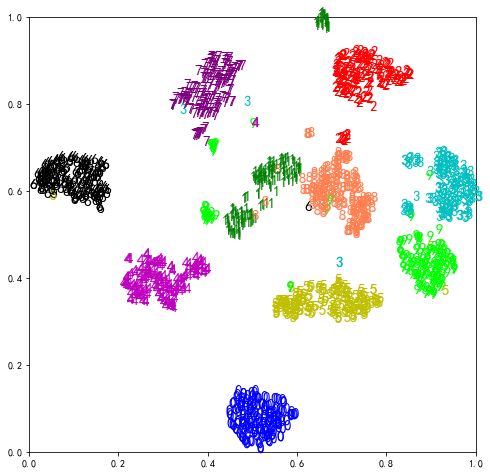

In [234]:
# 可视化降维后的结果
display2D(X_tsne)

#### 3.2.3 特征矩阵降为3维

In [235]:
tsne = TSNE(n_components = 3)
X_tsne3 = tsne.fit_transform(samples)

In [236]:
# 对降维后的数据进行归一化处理
X_tsne3 = MinMaxScaler().fit_transform(X_tsne3)

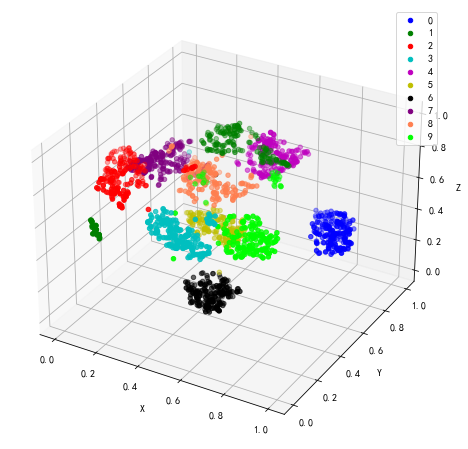

In [237]:
# 可视化降维后的结果
display3D(X_tsne3)

### 3.3 UMAP 数据降维

#### 3.3.1 UMAP 算法原理

UMAP是一种新颖且有趣的降维技术，与纯机器学习半经验算法tSNE截然不同，它基于可靠的数学原理。从UMAP论文来看，即使Leland McInnes试图在附录C中总结它们，UMAP和tSNE之间的差异也不是很明显。UMAP使用高维度上的指数概率分布，但不一定要像tSNE那样使用欧几里得距离，而是可以插入任何距离。此外，概率未归一化：

$$p_{i \mid j}=e^{-\frac{d\left(x_{i}, x_{j}\right)-\rho_{i}}{\sigma_{i}}}$$

 $\rho$ 是一个重要的参数，代表从第$i $ 个数据点到其第一个最近邻居的距离。这样可以确保流形的本地连通性。换句话说，这为每个数据点 提供了局部自适应的指数内核，因此距离度量因点而异。
 $\rho$  参数是UMAP论文第 2 节和第 3 节之间的唯一桥梁。否则，我看不到模糊简单集的构造(即第 2 节中的奇 特拓扑数据分析)与第 3 节中的UMAP的算法实现有什么关系。

UMAP并末对高维(或低维)概率进行归一化，这与tSNE有很大不同。仅从高维(或低维)概率的函数形 式(公式5)可以看出，它们已经针对段[0，1]进行了缩放，结果证明去掉归一化步骤(意味着不计算等式 (1)中的分母部分)大大减少了计算高维图的时间。

UMAP使用最近邻居的数量而不是困惑度。与之不同的是tSNE根据式(2)定义了困惑度。UMAP定义了 没有  \log 2  函数的最近邻居k的数量，即：

$$k=2^{\sum_{i} p_{i j}}$$

UMAP使用高维概率的对称化稍有不同:

$$p_{i j}=p_{i \mid j}+p_{j \mid i}-p_{i \mid j} p_{j \mid i}$$

高维概率对称化是必要的，因为在UMAP将具有局部变化的度量的点粘合在一起通过参数$\rho$  之后，可能会发生

$A$ 和$B$  节点之间的图的权重不等于$B$和$A$ 节点之间的权重的情况。不过我还不清楚，为什么UMAP使用这种对称，而没有使用tSNE的对称形 式。
UMAP使用曲线族
 $1 /(1+a \cdot y^{(2 b)})$来建模低维距离概率，不完全是学生$t$分布，而是非常相似。请再次注意，没有应用归一化：

$$q_{i j}=\left(1+a\left(y_{i}-y_{j}\right)^{2 b}\right)^{-1}$$

其中默认UMAP超参数的

$a \approx 1.93$和$ b \approx 0.79$实际上，对于$min_dist  =0.001$，我们可以将公式写成如下的形式:

$$\left(1+a\left(y_{i}-y_{j}\right)^{2 b}\right)^{-1} \approx\left\{1 \quad \text { if } y_{i}-y_{j} \leq \min \operatorname{mist}_{-} e^{-\left(y_{i}-y_{j}\right)-\min \text { dist }} \quad \text { if } y_{i}-y_{j}>\min _{-}\right. \text {dist }$$

为了演示如何精确找到  a  和b参数，让我们显示一个简单的分段函数(其中，通过min_dist参数定义平稳 部分)，并使用函数族
 $1 /\left(1+a \cdot y^{(2 b)}\right)$  ，方法是使用Scipy Python库中的optimize.curve_fit。作为拟合的结果，我们获得 了函数 $1 /\left(1+a \cdot y^{(2 b)}\right)$  的\text { I优化 } a \text { 和 } b \text { 参数. }
UMAP使用二进制交叉熵(CE)作为成本函数，而不是像tSNE那样使用KL散度。
$$C E(X, Y)=\sum_{i} \sum_{j}\left[p_{i j}(X) \log \left(\frac{p_{i j}(X)}{q_{i j}(Y)}\right)+\left(1-p_{i j}(X)\right) \log \left(\frac{1-p_{i j}(X)}{1-q_{i j}(Y)}\right)\right]$$
在下一节中，我们将显示CE成本函数中的这个附加项(第二项)使UMAP能够捕获全局数据结构，而tSNE只能以中等的困惑度值对局部结构进行建模。由于我们需要知道交叉熵的梯度才能在以后实现“梯度下降”，因此让我们快速进行计算。忽略仅包含p(X)的常数项，我们可以重写交叉熵并将其区分如下：
$$C E\left(X, d_{i j}\right)=\sum_{j}\left[-P(X) \log Q\left(d_{i j}\right)+(1-P(X)) \log \left(1-Q\left(d_{i j}\right)\right)\right], \quad \text { where } d_{i j}=y_{i}-y_{j}$$

与tSNE使用的随机法线初始化相反，UMAP使用Graph Laplacian分配初始低维坐标。但是，这对于 最终的结果影响不大。图拉普拉斯算子，谱聚类，拉普拉斯算子，扩散图，谱嵌入等方法，实际上是 将矩阵分解和近邻图方法结合在一起以解决降维问题的方法。在这种方法中，我们首先构造一个图(或 knn图)，然后通过构造拉普拉斯矩阵用矩阵代数(邻接度和度矩阵)对其进行形式化，最后我们对拉普 拉斯矩阵进行分解，即解决特征值分解问题。
$$L=D^{1 / 2}(D-A) D^{1 / 2}$$
最后，UMAP使用随机梯度下降(SGD)代替tSNE / FItSNE等常规梯度下降(GD)，这既加快了计算速 度，又消耗了更少的内存。

#### 3.3.2 特征矩阵降为2维

In [238]:
import umap

umaps = umap.UMAP(n_components = 2)
X_umap = umaps.fit_transform(samples)

In [239]:
# 对降维后的数据进行归一化处理
X_umap = MinMaxScaler().fit_transform(X_umap)

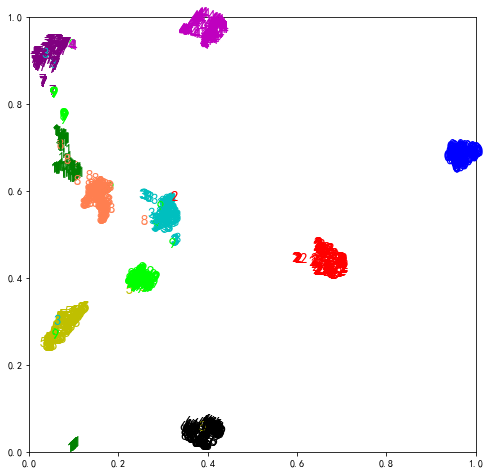

In [240]:
# 可视化降维后的结果
display2D(X_umap)

#### 3.3.3 特征矩阵降为3维

In [241]:
umaps = umap.UMAP(n_components = 3)
X_umap3 = umaps.fit_transform(samples)

In [242]:
# 对降维后的数据进行归一化处理
X_umap3 = MinMaxScaler().fit_transform(X_umap3)

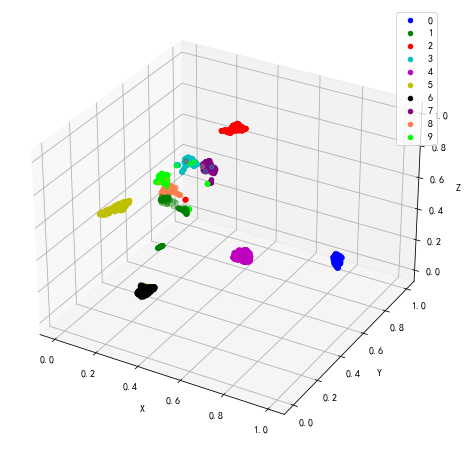

In [243]:
# 可视化降维后的结果
display3D(X_umap3)

## 四、KMeans 聚类分析

### 4.1 未降维处理的聚类

In [244]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
samples = MinMaxScaler().fit_transform(samples)

def clusterEstimate(X, title):
    """ 默认将手写数字聚为10类 """
    km = KMeans(n_clusters = 10, random_state=0)
    km.fit(X)

    # 计算聚类的轮廓系数
    score = silhouette_score(X, km.labels_)
    print(f"基于 {title}的轮廓系数为：{score:.4f}")


clusterEstimate(samples, "原始数据集")

基于 原始数据集的轮廓系数为：0.1811


### 4.2 基于 PCA 的聚类

In [245]:
clusterEstimate(X_pca, "PCA 2维特征聚类")

基于 PCA 2维特征聚类的轮廓系数为：0.3943


In [246]:
clusterEstimate(X_pca3, "PCA 3维特征聚类")

基于 PCA 3维特征聚类的轮廓系数为：0.3594


### 4.3 基于 T-SNE 的聚类

In [247]:
clusterEstimate(X_tsne, "T-SNE 2维特征聚类")

基于 T-SNE 2维特征聚类的轮廓系数为：0.6465


In [248]:
clusterEstimate(X_tsne3, "T-SNE 3维特征聚类")

基于 T-SNE 3维特征聚类的轮廓系数为：0.5381


### 4.4 基于 UMAP 的聚类

In [249]:
clusterEstimate(X_umap, "UMAP 2维特征聚类")

基于 UMAP 2维特征聚类的轮廓系数为：0.7804


In [250]:
clusterEstimate(X_umap3, "UMAP 3维特征聚类")

基于 UMAP 3维特征聚类的轮廓系数为：0.7927


## 五、实验结果分析

### 5.1 各降维处理的可视化对比

#### 5.1.1 降维结果的对比图

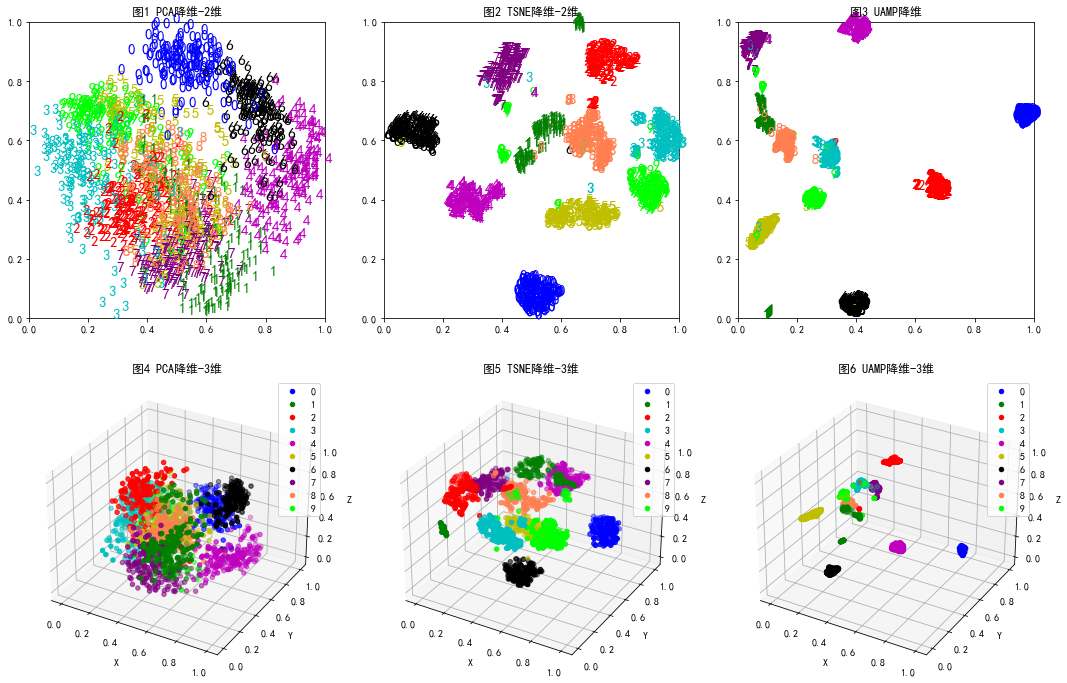

In [251]:
display2D(X_pca ,  '图1 PCA降维-2维',  (18, 12), 231)
display2D(X_tsne,  '图2 TSNE降维-2维', (18, 12), 232)
display2D(X_umap,  '图3 UAMP降维',     (18, 12), 233)

display3D(X_pca3 , '图4 PCA降维-3维',  (18, 12), 234)
display3D(X_tsne3, '图5 TSNE降维-3维', (18, 12), 235)
display3D(X_umap3, '图6 UAMP降维-3维', (18, 12), 236)

#### 5.1.2 降维效果的描述性分析

- 在图1、图4中，PCA 降维的数据点不能被有效区分，部分数据点揉杂在一起，且不同类间的区分间隔也不大，尤其是降为2维的效果很差。
- 在图2、图5中，T-SNE 降维的数据点的已经能被有效的区分，原特征降为为 2 维时就能有效区分数据点了。
- 在图3、图6中，UMAP 降维的数据点的区分度很高了，从图上可看出不同点簇间的间隔是要大于 T-SNE 的，即类外距离远大于类内距离。

- 综上，由对比图可知，特征将为同一维度时，PCA、T-SNE、UMAP 降维效果依次增高。

### 5.2 各降维处理的效果分析

#### 5.2.1 各降维方法相关指标对比



表 1：原特征降为2维的 K-means 聚类  

|   降为2维   | 基于 PCA 降维 | 基于 T-SNE 降维 | 基于 UMAP 降维 |
|:----------------: | :-----: | :--------: | :------: |
| **降维的时间消耗**  |  0.7s    |  6.2s     |   5.2s |
| **聚类的时间消耗**  |  <0.2s    |  <0.1s     |   <0.1s |
| **聚类的轮廓系数**  |  0.3943  |  0.6386   |   0.7801 |


<br>

表 2：原特征降为3维的 K-means 聚类

|  降为3维  | 基于 PCA 降维 | 基于 T-SNE 降维 | 基于 UMAP 降维 |
|:----------------: | :-----: | :-------: | :-------: |
| **降维的时间消耗**  |  0.1s   |  11.1s    |   5.1s    |
| **聚类的时间消耗**  |  <0.2s    |  <0.1s  |   <0.1s |
| **聚类的轮廓系数**  | 0.3594  |  0.5770   |  0.7745   |

<br>

注：
- 未降维处理的 K-means 聚类的时间消耗 ≈ 0.300s
- 未降维处理的 K-means 聚类的轮廓系数为 0.1825
- 由于运行平台不同，以上数据结果不尽相同


#### 5.2.2 各降维相关指标对比分析

- 从表 1 的对比中可知，虽然 PCA 降维的时间消耗少，但是其降维效果不是很理想。
- 未经降维处理而直接聚类的轮廓系数为 0.1825，而经 PCA 降维后的聚类轮廓系数也仅为 0.3594。
- 从表 1、表 2 中可看出，T-SNE 的降维效果要优于 PCA 的降维效果，但是时间成本却远远高于 PCA。
- UMAP 的降维效果要优于 T-SNE，且时间成本要低于 T-SNE。
- 由 2 维和 3 维的轮廓系数，已目前数据难以发现聚类效果好坏与降维的维数有明显联系。
- 综合来说 PCA 降维时间成本低，但效果差；UMAP 降维效果很有效，但时间成本略高。

## 六、实验结论及后续展望

### 6.1 PCA 的优缺点
优点：

1. 通过PCA降维之后的各个主成分之间是正交的，可以消除原始数据之间相互影响的因素。

2. PCA降维的计算过程并不复杂，因为主要就是对一个协方差矩阵做特征值分解，因此实现起来较简单容易。

3. 在保留大部分主要信息的前提下，起到了降维效果。

缺点：

1. 主成分特征维度的含义具有模糊性，解释性差。（我们最多可以理解成主成分只是由原来的坐标维度线性相加的结果，但加出来之后它到底是啥就不好说了）

2. PCA降维的标准是选取令原数据在新坐标轴上方差最大的主成分。但方差小的特征就不一定不重要，这样的唯一标准有可能会损失一些重要信息。

3. PCA毕竟是只保留特定百分比的主成分，属于“有损压缩”，难免会损失一些信息。


### 6.2 T-SNE 的优缺点

优点:

1. 可更好地可视化高维数据，并在低维空间在一定程度上保持原有的数据结构

2. 相较于CPA,聚类效果要明显更好

缺点:

1. 主要用于可视化，很难用于其他目的。比如测试集合降维，因为他没有显式的预估部分，不能在测试集合直接降维；比如降维到10维，因为t分布偏重长尾，1个自由度的t分布很难保存好局部特征，可能需要设置成更高的自由度；

2. t-SNE倾向于保存局部特征，对于本征维数(intrinsic dimensionality)本身就很高的数据集，是不可能完整的映射到2-3维的空间；

3. t-SNE没有唯一最优解，且没有预估部分。如果想要做预估，可以考虑降维之后，再构建一个回归方程之类的模型去做。但是要注意，t-SNE中距离本身没有意义，都是概率分布问题；

4. 训练太慢。有很多基于树的算法在t-SNE上做一些改进。


### 6.3 UMAP优缺点

优点:

1. 对全局结构和局部结构的双重捕捉

2. UMAP算法运行时间短

3. 受样本大小约束较小

4. UMAP 在数万维范围内仍然表现良好

缺点:

- 在优化的过程中容易陷入局部最优

### 6.4 后续展望

&emsp;&emsp;有时我们无法考虑和分析收集到的所有特征。在样本特征的采取中，不一定力求信息量大、可供决策的依据多的高维数据。由于数据维度高，需要考虑实际的计算能力。从而降低高维度数据的缺点，消耗计算资源，计算时间大，同时减轻冗余且耦合的数据对实验结果造成影响。相反，特征太多以至于考虑所有特征会显著提高分析成本、或者有些特征干脆只是没有真实意义的噪音。

&emsp;&emsp;得益于降维处理的优点，我们后续可以对规模更大、特征维度更高的样本数据进行分类训练。例如更大规模的 MNIST 手写数字的聚类分析等。

## 七、参考文献

[1] 郭艳萍, 高云, 吕丙东.基于 t-SNE 降维的数据可视化分析研究[J].电子技术与软件工程, 2021(21):166-170.

[2] 黄欣辰, 皋军, 黄豪杰.基于 PCA 降维的成对约束半监督聚类集成[J].计算机与现代化, 2021(01):94-99.

[3] 朱卫坪, 陈晓峰, 张萍, 郭靖, 马培勇.基于 t-SNE 降维与 k-means 聚类算法的化工厂节能减排分析[J].自动化应用, 2022(01):10-13.DOI:10.19769/j.zdhy.2022.01.003.